In [ ]:
!rm -rf camp_data
!git clone https://github.com/HongJeSeong/camp_data.git

Cloning into 'camp_data'...
remote: Enumerating objects: 23, done.
remote: Counting objects: 100% (23/23), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 23 (delta 6), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (23/23), done.


In [ ]:
!ls camp_data

covidKorea.csv	covidTime.csv  influenzaCovid.csv  README.md  wine.csv


In [ ]:
import pandas as pd
df = pd.read_csv("camp_data/wine.csv")
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
result = le.fit_transform(df["style"])
df["style"] = result
df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [ ]:
from sklearn.model_selection import train_test_split
x_data = df.drop("style",axis=1)
y_data = df["style"]

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=30)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((5197, 12), (1300, 12), (5197,), (1300,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(12,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(2, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

# build the model
history = model.fit(x_train, y_train, epochs=200,batch_size=256, validation_data=(x_test, y_test))

Epoch 1/200
21/21 [==============================] - 1s 15ms/step - loss: 0.9814 - accuracy: 0.7206 - val_loss: 0.2161 - val_accuracy: 0.9146
Epoch 2/200
21/21 [==============================] - 0s 11ms/step - loss: 0.2164 - accuracy: 0.9224 - val_loss: 0.1627 - val_accuracy: 0.9477
Epoch 3/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1970 - accuracy: 0.9307 - val_loss: 0.1518 - val_accuracy: 0.9515
Epoch 4/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1849 - accuracy: 0.9318 - val_loss: 0.1455 - val_accuracy: 0.9538
Epoch 5/200
21/21 [==============================] - 0s 5ms/step - loss: 0.1810 - accuracy: 0.9347 - val_loss: 0.1358 - val_accuracy: 0.9538
Epoch 6/200
21/21 [==============================] - 0s 4ms/step - loss: 0.1618 - accuracy: 0.9427 - val_loss: 0.1343 - val_accuracy: 0.9600
Epoch 7/200
21/21 [==============================] - 0s 6ms/step - loss: 0.1528 - accuracy: 0.9446 - val_loss: 0.1276 - val_accuracy: 0.9562
Epoch 8/200

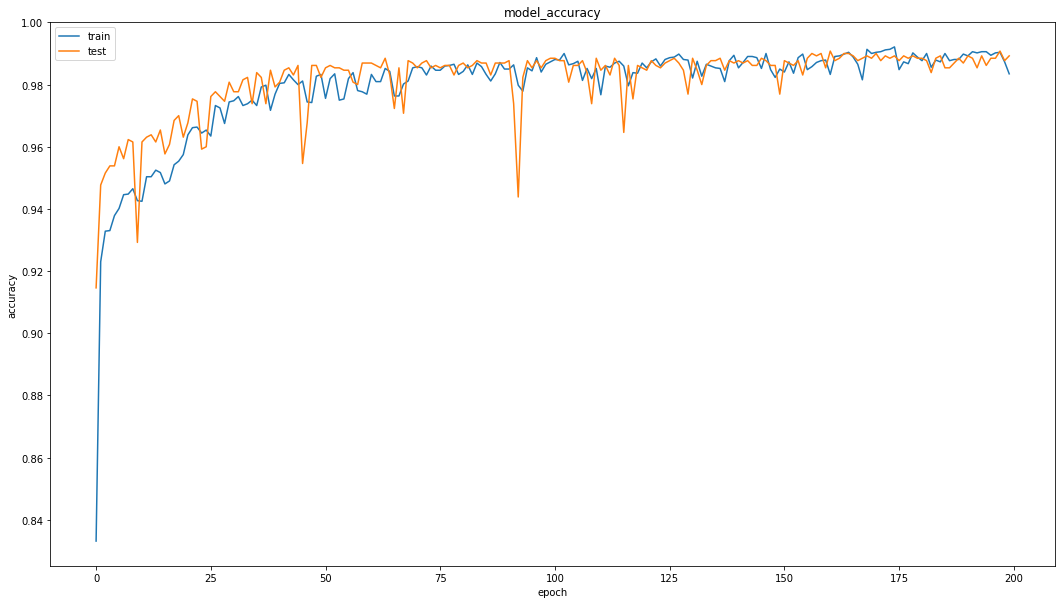

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model_accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()

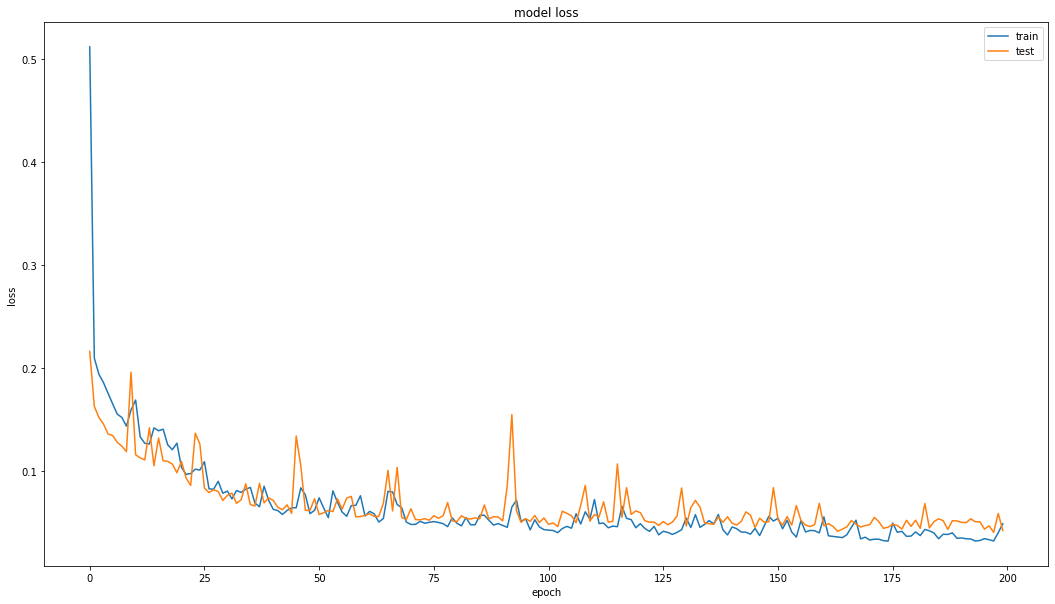

In [ ]:
plt.figure(figsize=(18, 10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')
plt.show()